In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.io import loadmat
from sklearn.svm import SVC

In [2]:
mat = loadmat("ex6data1.mat")

X = mat["X"]
y = mat["y"]

## Plotting Data

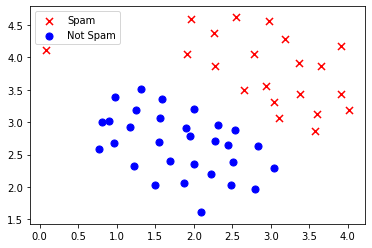

In [3]:
pos, neg = (y==1), (y==0)
plt.scatter(X[pos[:,0],0],X[pos[:,0],1],c="r",marker="x",s=50)
plt.scatter(X[neg[:,0],0],X[neg[:,0],1],c="b",marker="o",s=50)
plt.legend(("Spam", "Not Spam"))

## Using Support Vector Machine (Linear Kernel)

In [4]:
classifier = SVC(kernel="linear", C = 1)
classifier.fit(X,np.ravel(y))

SVC(C=1, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [5]:
def make_meshgrid(x, y, h = .02):

    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    return xx, yy

## Visualising the Decision Boundary

(1.5, 5)

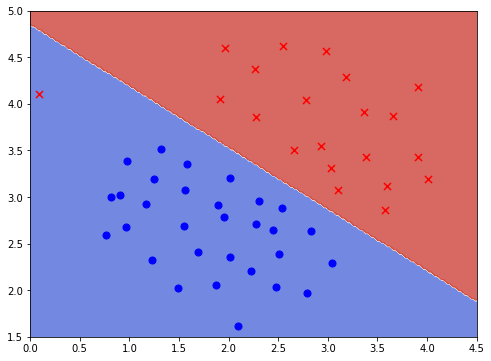

In [6]:
plt.figure(figsize = (8, 6))

# Plotting the decision boundary
X_1, X_2 = make_meshgrid(X[:, 0], X[:, 1])
Z = classifier.predict(np.c_[X_1.ravel(), X_2.ravel()])
Z = Z.reshape(X_1.shape)
plt.contourf(X_1, X_2, Z, cmap = plt.cm.coolwarm, alpha= 0.8)

plt.scatter(X[pos[:,0],0],X[pos[:,0],1],c="r",marker="x",s=50)
plt.scatter(X[neg[:,0],0],X[neg[:,0],1],c="b",marker="o",s=50)
plt.xlim(0,4.5)
plt.ylim(1.5,5)

In [7]:
# Test C = 100

classifier2 = SVC(C=100,kernel="linear")
classifier2.fit(X,np.ravel(y))

SVC(C=100, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

(1.5, 5)

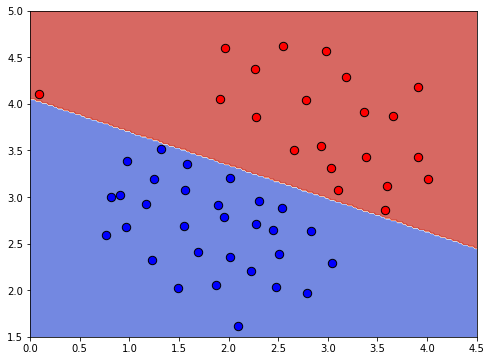

In [8]:
plt.figure(figsize = (8, 6))

# Plotting the decision boundary
X_3, X_4 = make_meshgrid(X[:, 0], X[:, 1])
Z = classifier2.predict(np.c_[X_3.ravel(), X_4.ravel()])
Z = Z.reshape(X_3.shape)
plt.contourf(X_3, X_4, Z, cmap = plt.cm.coolwarm, alpha = 0.8)

plt.scatter(X[pos[:, 0], 0], X[pos[:, 0], 1], c = 'r', edgecolors = 'k', s = 70)
plt.scatter(X[neg[:, 0], 0], X[neg[:, 0], 1], c = 'b', edgecolors = 'k', s = 70)
plt.xlim(0,4.5)
plt.ylim(1.5,5)

## SVM with Gaussian Kernel

In [9]:
mat2 = loadmat("ex6data2.mat")

X2 = mat2["X"]
y2 = mat2["y"]

(0.4, 1)

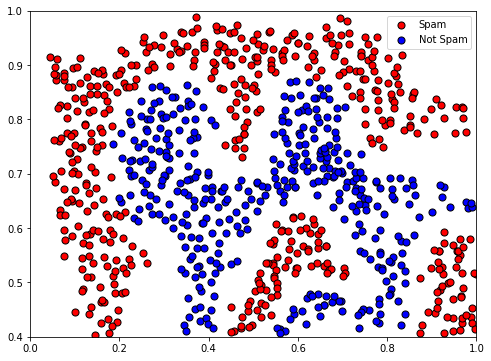

In [10]:
pos2, neg2 = (y2 == 1), (y2 == 0)

plt.figure(figsize = (8, 6))
plt.scatter(X2[pos2[:,0],0], X2[pos2[:,0],1], c="r", edgecolors = 'k', s = 50)
plt.scatter(X2[neg2[:,0],0], X2[neg2[:,0],1], c="b", edgecolors = 'k', s = 50)
plt.legend(("Spam", "Not Spam"))
plt.xlim(0, 1)
plt.ylim(0.4, 1)

In [11]:
classifier3 = SVC(kernel="rbf", gamma = 30)
classifier3.fit(X2,y2.ravel())

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=30, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

## Visualising the Decision Boundary

(0.4, 1)

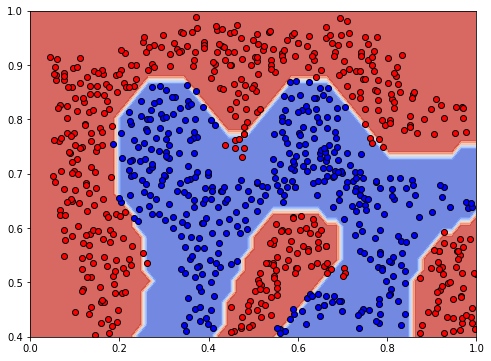

In [12]:
plt.figure(figsize = (8, 6))

# Plotting the decision boundary
X_5, X_6 = make_meshgrid(X2[:, 0], X2[:, 1])
Z = classifier3.predict(np.c_[X_5.ravel(), X_6.ravel()])
Z = Z.reshape(X_5.shape)
plt.contourf(X_5, X_6, Z, cmap = plt.cm.coolwarm, alpha = 0.8)

plt.scatter(X2[pos2[:, 0], 0], X2[pos2[:, 0], 1], c = 'r', edgecolors = 'k')
plt.scatter(X2[neg2[:, 0], 0], X2[neg2[:, 0], 1], c = 'b', edgecolors = 'k')
plt.xlim(0, 1)
plt.ylim(0.4, 1)

## Dataset: ex6data2.mat

In [13]:
mat3 = loadmat("ex6data3.mat")

X3 = mat3["X"]
y3 = mat3["y"]
Xval = mat3["Xval"]
yval = mat3["yval"]

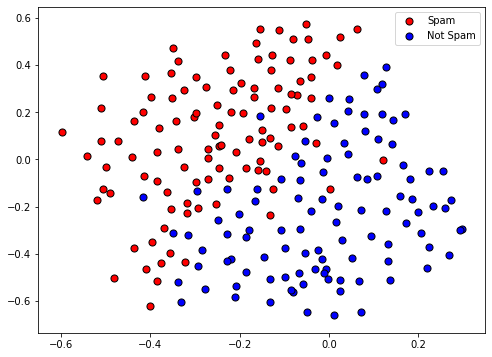

In [14]:
pos3, neg3 = (y3 == 1), (y3 == 0)

plt.figure(figsize = (8, 6))
plt.scatter(X3[pos3[:,0],0], X3[pos3[:,0],1], c="r", edgecolors = 'k', s = 50)
plt.scatter(X3[neg3[:,0],0], X3[neg3[:,0],1], c="b", edgecolors = 'k', s = 50)
plt.legend(("Spam", "Not Spam"))

## Hyperparameter Tuning

In [15]:
def dataset3Params(X, y, Xval, yval):
    """
    Returns your choice of C and sigma. You should complete this function to return the optimal C and 
    sigma based on a cross-validation set.
    """
    C_values = [0.01, 0.03, 0.1, 0.3, 1, 3, 10, 30]
    sigma_values = [0.01, 0.03, 0.1, 0.3, 1, 3, 10, 30]
    
    acc = 0
    best_C = 0
    best_gamma = 0
    for i in C_values:
        for j in sigma_values:
            classifier = SVC(kernel='rbf', C = i, gamma = j)
            classifier.fit(X, y.ravel())
            prediction = classifier.predict(Xval)
            score = classifier.score(Xval, yval.ravel())
            #print(score)
            
            if score > acc:
                acc = score
                best_C = i
                best_gamma = j
    return best_C, best_gamma

In [16]:
C, gamma = dataset3Params(X3, y3, Xval, yval)

classifier4 = SVC(kernel = 'rbf', C = C, gamma = 3)
classifier4.fit(X3,y3.ravel())

SVC(C=3, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=3, kernel='rbf', max_iter=-1,
    probability=False, random_state=None, shrinking=True, tol=0.001,
    verbose=False)

## Visualising the Decision Boundary

(-0.8, 0.6)

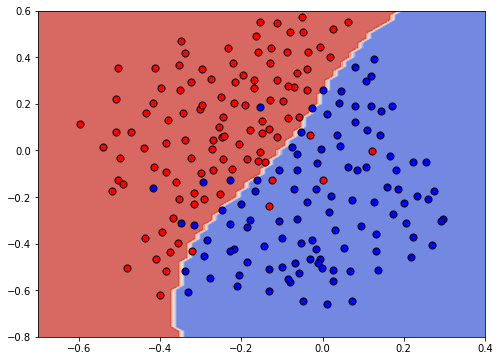

In [17]:
plt.figure(figsize = (8, 6))

# Plotting the decision boundary
X_7, X_8 = make_meshgrid(X3[:, 0], X3[:, 1])
Z = classifier4.predict(np.c_[X_7.ravel(), X_8.ravel()])
Z = Z.reshape(X_7.shape)
plt.contourf(X_7, X_8, Z, cmap = plt.cm.coolwarm, alpha = 0.8)

plt.scatter(X3[pos3[:,0],0], X3[pos3[:,0],1], c="r", edgecolors = 'k', s = 50)
plt.scatter(X3[neg3[:,0],0], X3[neg3[:,0],1], c="b", edgecolors = 'k', s = 50)
plt.xlim(-0.7,0.4)
plt.ylim(-0.8,0.6)

## Spam Classifier

In [19]:
import re
from nltk.stem import PorterStemmer

file_contents = open("emailSample1.txt","r").read()
vocabList = open("vocab.txt","r").read()

In [20]:
vocabList=vocabList.split("\n")[:-1]

vocabList_d={}
for ea in vocabList:
    value,key = ea.split("\t")[:]
    vocabList_d[key] = value

In [21]:
file_contents

"> Anyone knows how much it costs to host a web portal ?\n>\nWell, it depends on how many visitors you're expecting.\nThis can be anywhere from less than 10 bucks a month to a couple of $100. \nYou should checkout http://www.rackspace.com/ or perhaps Amazon EC2 \nif youre running something big..\n\nTo unsubscribe yourself from this mailing list, send an email to:\ngroupname-unsubscribe@egroups.com\n\n"

## Preprocessing emails

In [22]:

def processEmail(email_contents,vocabList_d):
    """
    Preprocesses the body of an email and returns a list of indices of the words contained in the email. 
    """
    # Lower case
    email_contents = email_contents.lower()
    
    # Handle numbers
    email_contents = re.sub("[0-9]+","number",email_contents)
    
    # Handle URLS
    email_contents = re.sub("[http|https]://[^\s]*","httpaddr",email_contents)
    
    # Handle Email Addresses
    email_contents = re.sub("[^\s]+@[^\s]+","emailaddr",email_contents)
    
    # Handle $ sign
    email_contents = re.sub("[$]+","dollar",email_contents)
    
    # Strip all special characters
    specialChar = ["<","[","^",">","+","?","!","'",".",",",":"]
    for char in specialChar:
        email_contents = email_contents.replace(str(char),"")
    email_contents = email_contents.replace("\n"," ")    
    
    # Stem the word
    ps = PorterStemmer()
    email_contents = [ps.stem(token) for token in email_contents.split(" ")]
    email_contents= " ".join(email_contents)
    
    # Process the email and return word_indices
    
    word_indices=[]
    
    for char in email_contents.split():
        if len(char) >1 and char in vocabList_d:
            word_indices.append(int(vocabList_d[char]))
    
    return word_indices

In [23]:
word_indices= processEmail(file_contents,vocabList_d)

## Extracting features from emails

In [24]:
def emailFeatures(word_indices, vocabList_d):
    """
    Takes in a word_indices vector and  produces a feature vector from the word indices. 
    """
    n = len(vocabList_d)
    
    features = np.zeros((n,1))
    
    for i in word_indices:
        features[i] =1
        
    return features

In [25]:
features = emailFeatures(word_indices,vocabList_d)
print("Length of feature vector: ",len(features))
print("Number of non-zero entries: ",np.sum(features))

Length of feature vector:  1899
Number of non-zero entries:  43.0


## Training SVM for spam classification

In [26]:
spam_mat = loadmat("spamTrain.mat")
X_train =spam_mat["X"]
y_train = spam_mat["y"]

In [28]:
C =0.1
spam_svc = SVC(C=0.1,kernel ="linear")
spam_svc.fit(X_train,y_train.ravel())
print("Training Accuracy:",(spam_svc.score(X_train,y_train.ravel()))*100,"%")

Training Accuracy: 99.825 %


In [29]:
spam_mat_test = loadmat("spamTest.mat")
X_test = spam_mat_test["Xtest"]
y_test =spam_mat_test["ytest"]

In [30]:

spam_svc.predict(X_test)
print("Test Accuracy:",(spam_svc.score(X_test,y_test.ravel()))*100,"%")

Test Accuracy: 98.9 %


## Top predictors for spam

In [31]:
weights = spam_svc.coef_[0]
weights_col = np.hstack((np.arange(1,1900).reshape(1899,1),weights.reshape(1899,1)))
df = pd.DataFrame(weights_col)

df.sort_values(by=[1],ascending = False,inplace=True)

predictors = []
idx=[]
for i in df[0][:15]:
    for keys, values in vocabList_d.items():
        if str(int(i)) == values:
            predictors.append(keys)
            idx.append(int(values))

In [32]:
print("Top predictors of spam:")

for _ in range(15):
    print(predictors[_],"\t\t",round(df[1][idx[_]-1],6))


Top predictors of spam:
our 		 0.500614
click 		 0.465916
remov 		 0.422869
guarante 		 0.383622
visit 		 0.36771
basenumb 		 0.345064
dollar 		 0.323632
will 		 0.269724
price 		 0.267298
pleas 		 0.261169
most 		 0.257298
nbsp 		 0.253941
lo 		 0.253467
ga 		 0.248297
hour 		 0.246404
